In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("Zomato_data.csv")

In [9]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# Convert datatype of column - rate in 4.5 form 

In [10]:
def handlerate(value):
    value = str(value).split("/")
    value=value[0]
    return float(value)

df['rate'] = df['rate'].apply(handlerate)

In [11]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# Summary of data 

In [13]:
df.info()            # there is no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Type of Resturant

### Q1. What type of Resturant the majority of coustomer order from 

Text(0.5, 0, 'Type of Resturant')

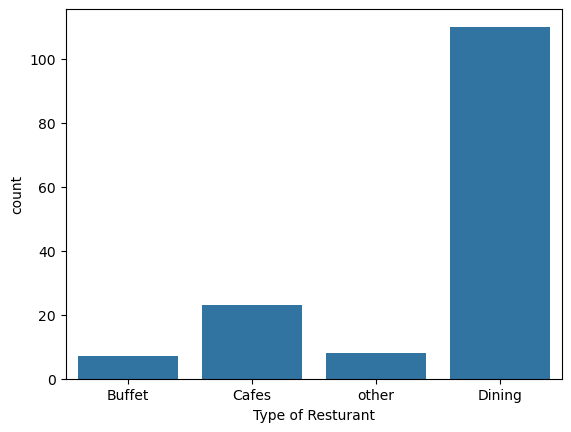

In [18]:
sns.countplot(x=df["listed_in(type)"])
plt.xlabel("Type of Resturant")

### Q2. How many votes each type of Resturant recived from the coustomer

In [20]:
grouped = df.groupby("listed_in(type)")['votes'].sum()
result = pd.DataFrame({'votes':grouped})

In [21]:
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0, 0.5, 'Votes')

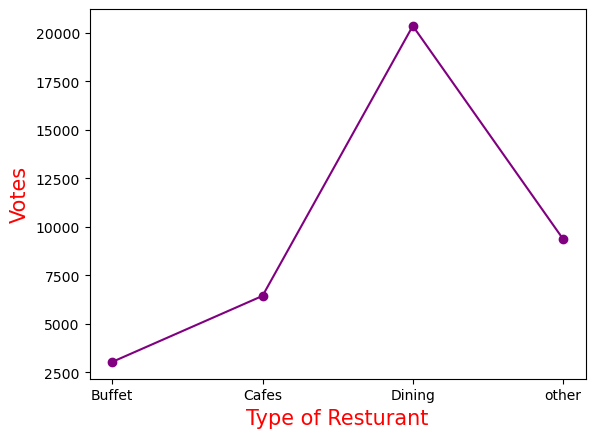

In [22]:
plt.plot(result,c='purple',marker='o')
plt.xlabel('Type of Resturant',size=15,c='red')
plt.ylabel('Votes',size=15,c='red')

### Q3. What are the rating that the majority resturants have recived?

<function matplotlib.pyplot.show(close=None, block=None)>

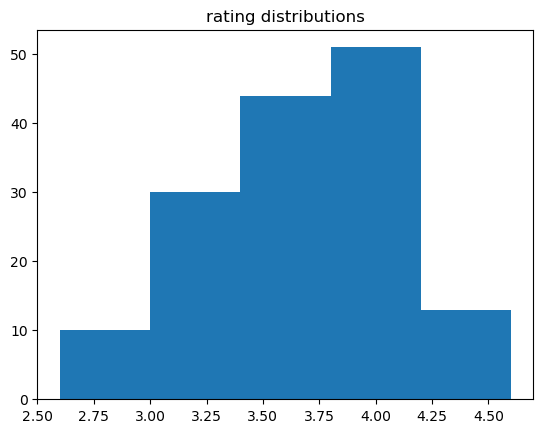

In [30]:
plt.hist(df['rate'],bins=5)
plt.title('rating distributions')
plt.show

### Q4.Zomato has observed that the most of the couples order there food online.What is there avg spending on there order ?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

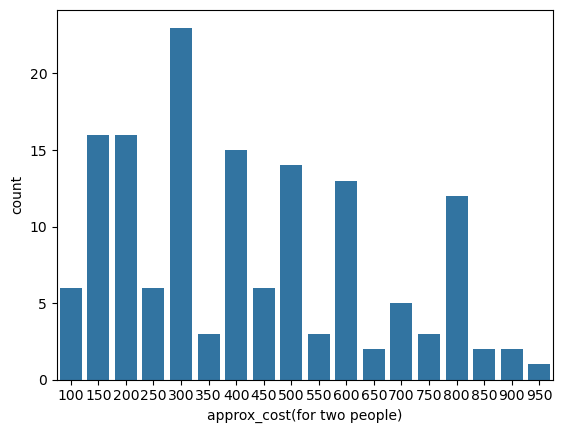

In [33]:
coupel_data = df['approx_cost(for two people)']
sns.countplot(x=coupel_data)

### Q5. Which mode has recived max rating

In [35]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

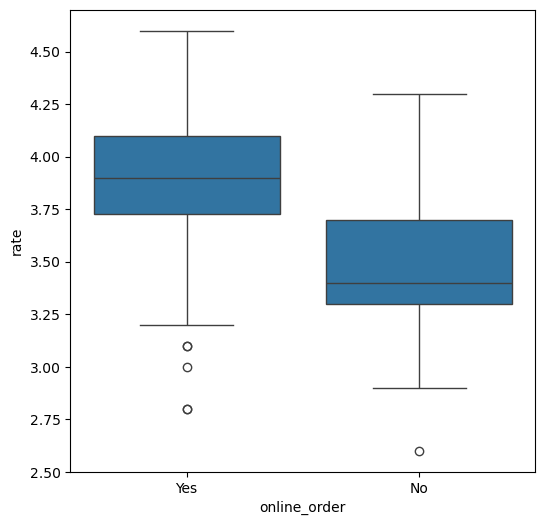

In [39]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df['online_order'], y=df['rate'])

### Q6. Which type of resturant recived most ofline order

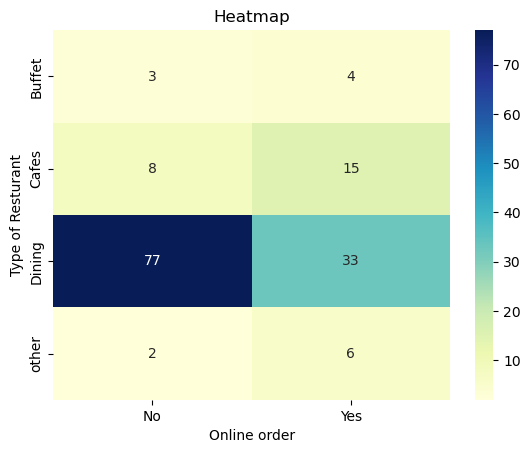

In [40]:
pivot_table = df.pivot_table(index='listed_in(type)', columns="online_order", aggfunc='size', fill_value=0)
sns.heatmap(pivot_table,annot=True, cmap='YlGnBu',fmt='d')
plt.title("Heatmap")
plt.xlabel("Online order")
plt.ylabel("Type of Resturant")
plt.show()